# scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

把特征扩大1倍，本质上也是数据预处理

In [3]:
from sklearn.preprocessing.data import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [5]:
X.shape, X2.shape

((100, 1), (100, 3))

In [6]:
# 它已经自动帮我们增加了一个常数，代表0次列
X2[:5,:]

array([[ 1.        ,  0.22086515,  0.04878142],
       [ 1.        , -0.77678021,  0.6033875 ],
       [ 1.        ,  2.08885376,  4.36331005],
       [ 1.        , -1.93171647,  3.73152854],
       [ 1.        ,  2.49741083,  6.23706086]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


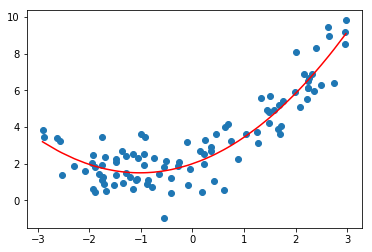

In [8]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [9]:
lin_reg2.coef_

array([ 0.        ,  0.97047809,  0.47590158])

In [10]:
lin_reg2.intercept_

1.9998190041963848

## 关于PolynomialFeatures

### 2元2次

In [11]:
X = np.arange(1, 11).reshape(-1,2)
X.shape

(5, 2)

In [12]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [13]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [14]:
X2

# 第4列为第2列的平方
# 第5列为第2列与第3列的乘积
# 第6列为第3列的平方

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

### 3元2次

In [15]:
X = np.arange(1, 10).reshape(-1,3)
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,   6.,  16.,  20.,  24.,  25.,  30.,  36.],
       [  1.,   7.,   8.,   9.,  49.,  56.,  63.,  64.,  72.,  81.]])

### 2元3次

In [16]:
X = np.arange(1, 11).reshape(-1,2)
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[    1.,     1.,     2.,     1.,     2.,     4.,     1.,     2.,
            4.,     8.],
       [    1.,     3.,     4.,     9.,    12.,    16.,    27.,    36.,
           48.,    64.],
       [    1.,     5.,     6.,    25.,    30.,    36.,   125.,   150.,
          180.,   216.],
       [    1.,     7.,     8.,    49.,    56.,    64.,   343.,   392.,
          448.,   512.],
       [    1.,     9.,    10.,    81.,    90.,   100.,   729.,   810.,
          900.,  1000.]])

## Pipeline
将3个步骤合在一起：多项式特征，数据归一化，线性回归

In [17]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing.data import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

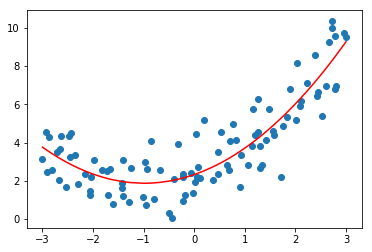

In [22]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()